# Mindful Eating and Weight Loss: 


Primary eating is defined as time that is dedicated to the goal of eating without distraction from secondary activities. 
A recent review of studies on attention, memory and food intake suggest that eating quickly or while distracted can lead to overeating. Analysis of data collected as part of the Eating & Health Module of the US Census and found that obese individuals spend significantly less time eating as a primary activity than overweight or healthy weight people (see below). Also, people who reported exercising also reported spending significantly more time eating as a primary activity and had as a group had a significantly lower bmi.

Obesity affects 1/3 of the US population. Being obese is strongly correlated with a variety of debilitating and life threatening diseases. Current strategies for losing weight including calorie-counting and physical exercise are overwhelmingly fail to result in longterm weight loss. It is imperative to continue looking at alternative strategies to combat the obesity epidemic. Bringing a mindful approach to eating meals could be a sustainable habit with a lasting positive impact on weight management. 

http://www.health.harvard.edu/blog/distracted-eating-may-add-to-weight-gain-201303296037
http://time.com/4306564/mindfulness-diet-meditation/

### Hypothesis:
I hypothesize that increasing time spent eating as a primary activity and exercising daily will significantly reduce the mean body mass index of a sample of individuals whose bmi falls within the obese range relative to a control group. I will test the null hypothesis that dedicated time to eating and exercise has no impact on bmi in the test group.


### Analysis of Eating and Health Module Data (Part of the American Time Use Survey):

In [294]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

% matplotlib inline

In [295]:
# Create a dataframe from CSV file of Eating and Health Module - downloaded from Kaggle
data = pd.read_csv("C:\\Users\\stace\\OneDrive\\Documents\\Jupyter\\ehresp_2014.csv")
df_eh = pd.DataFrame(data)


In [296]:
# Print original column headers
column_headers = list(df_eh.columns.values)
print(column_headers)

['tucaseid', 'tulineno', 'eeincome1', 'erbmi', 'erhhch', 'erincome', 'erspemch', 'ertpreat', 'ertseat', 'ethgt', 'etwgt', 'eudietsoda', 'eudrink', 'eueat', 'euexercise', 'euexfreq', 'eufastfd', 'eufastfdfrq', 'euffyday', 'eufdsit', 'eufinlwgt', 'eusnap', 'eugenhth', 'eugroshp', 'euhgt', 'euinclvl', 'euincome2', 'eumeat', 'eumilk', 'euprpmel', 'eusoda', 'eustores', 'eustreason', 'eutherm', 'euwgt', 'euwic', 'exincome1']


In [297]:
# change column headers to be more intuitive for the sake of data analysis based on the data dictionary for the dataset
# https://www.bls.gov/tus/ehmintcodebk1416.pdf

df_final = df_eh.rename(columns = {'tucaseid':'household_id', 'tulineno':'ind_in_household', 'erbmi':'bmi','eeincome1':'income_rating','erhhch':'change_number_in_house','erincome':'income_rel_pov_thres',\
                        'erspemch':'change_employ_status','ertpreat':'time_1_eating','ertseat':'time_2_eating',\
                        'ethgt':'height_top_or_bottom_coded','etwgt':'weight_top_or_bottom_coded','eudietsoda':'soda_diet?',\
                        'eudrink':'drink_bevs','eueat':'secondary_eating?', 'euexercise':'exercise',\
                        'euexfreq':'times_exercised','eufastfd':'fast_food_consumption', 'eufastfdfrq':'#_fast_food_7_days',\
                        'euffyday':'fast_food_yesterday','eufdsit': 'household_food_consumption_rating',\
                        'eufinlwgt':'final_weight','eusnap':'food_stamps','eugenhth':'physical_health_rating',\
                        'eugroshp':'primary_grocery_shopper', 'euhgt':'height','euinclvl':'pov_thres_year',\
                        'euincome2':'income_rating_last_month','eumeat':'any_meals_with_meat','eumilk':'consumed_raw_milk',\
                        'euprpmel':'primary_cook','eusoda':'drank_soda','eustores':'store_type','eustreason':'store_type_reason',\
                        'eutherm':'meat_thermometer_used','euwgt':'weight','euwic':'wic_assistance',\
                        'exincome1':'income_allocation_flag'})

In [298]:
# print new list of column names for reference
column_list_final = list(df_final.columns.values)
print(column_list_final)


['household_id', 'ind_in_household', 'income_rating', 'bmi', 'change_number_in_house', 'income_rel_pov_thres', 'change_employ_status', 'time_1_eating', 'time_2_eating', 'height_top_or_bottom_coded', 'weight_top_or_bottom_coded', 'soda_diet?', 'drink_bevs', 'secondary_eating?', 'exercise', 'times_exercised', 'fast_food_consumption', '#_fast_food_7_days', 'fast_food_yesterday', 'household_food_consumption_rating', 'final_weight', 'food_stamps', 'physical_health_rating', 'primary_grocery_shopper', 'height', 'pov_thres_year', 'income_rating_last_month', 'any_meals_with_meat', 'consumed_raw_milk', 'primary_cook', 'drank_soda', 'store_type', 'store_type_reason', 'meat_thermometer_used', 'weight', 'wic_assistance', 'income_allocation_flag']


### Survey Questions and valid answers to variables of interest:

1. Exercise (column: exercise):
    ->Question: During the past 7 days, [fill: other than your regular job,**] did you EH Respondent File
    participate in any physical activities or exercises for fitness and health
    such as running, bicycling, working out in a gym, walking for exercise, or
    playing sports?
    ->Valid Entries: 1 Yes 2 No 
2. Personal Health Rating (column: physical_health_rating):
    ->Question: In general, would you say that your physical health was excellent, very EH Respondent File
      good, good, fair, or poor?
    -> Valid Entries: 1 Excellent 2 Very good 3 Good 4 Fair 5 Poor 
3. Time spent Secondary Eating (column:time_2_eating):
    ->Question: Total amount of time spent in secondary eating (in minutes)
    ->Valid Entries: 1 Min Value 1440 Max Value 
4. Time spent Primary Eating: (column: time_1_eating):
    ->Question: Total amount of time spent in primary eating and drinking (in minutes) 
    ->->Valid Entries: 1 Min Value 1440 Max Value
5.  Body mass index  (column: bmi)
    -> Valid Entries: 0 Min Value 200 Max Value 


In [299]:
 #Create a dataframe that limits the records to valid responses (>0)
df_secondary_eating = df_final[(df_final['exercise']>0) & (df_final['physical_health_rating']> 0) & (df_final['bmi'] >0)\
                    & (df_final['time_2_eating'] > -1) & (df_final['time_1_eating'] > -1) & (df_final['secondary_eating?'] > 0)]

phr_values = {1:'1-Excellent', 2: '2-Very good', 3: '3-Good', 4: '4-Fair', 5: '5-Poor'}
exercise_values = {1:'1-Exercise', 2: '2-No Exercise'} 
df_secondary_eating['physical_health_rating'] = df_secondary_eating['physical_health_rating'].map(phr_values)
df_secondary_eating['exercise'] = df_secondary_eating['exercise'].map(exercise_values)


C:\Users\stace\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\stace\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


### T-tests to compare groups:

In [300]:
#is there a significant difference in time spent primary eating, secondary eating or bmi for people who reported exercising in
# the past week

# Test the relationship between eating habits and exercise
a = df_secondary_eating['time_2_eating'].ix[lambda x: df_secondary_eating['exercise'] == '1-Exercise']
mean_a = a.mean()
b = df_secondary_eating['time_2_eating'].ix[lambda x: df_secondary_eating['exercise'] == '2-No Exercise']
mean_b = b.mean()
print(df_secondary_eating['exercise'].unique())
tval,pval=stats.ttest_ind(b, a,equal_var=True)
print('Groups: Exercise, No-Exercise, Variable: Time Spent Secondary Eating')
print("t-value:",tval,'\n',"p-value", pval,'\n',"Mean Secondary Eating Exercise Group:",mean_a,'\n',"Mean Secondary Eating No Exercise Group:",mean_b)


c = df_secondary_eating['time_1_eating'].ix[lambda x: df_secondary_eating['exercise'] == '1-Exercise']
mean_c = c.mean()
d = df_secondary_eating['time_1_eating'].ix[lambda x: df_secondary_eating['exercise'] == '2-No Exercise']
mean_d = d.mean()

tval,pval=stats.ttest_ind(d, c,equal_var=True)
print('\n Groups: Exercise, No-Exercise, Variable: Time Spent Primary Eating')
print("t-value:",tval,'\n',"p-value", pval,'\n',"Mean Primary Eating Exercise Group:"\
      ,mean_c,'\n',"Mean Primary Eating No Exercise Group:",mean_d)

e = df_secondary_eating['bmi'].ix[lambda x: df_secondary_eating['exercise'] == '1-Exercise']
mean_e = e.mean()
f = df_secondary_eating['bmi'].ix[lambda x: df_secondary_eating['exercise'] == '2-No Exercise']
mean_f = f.mean()
tval,pval=stats.ttest_ind(e, f,equal_var=True)

print('\n Groups: Exercise, No-Exercise, Variable: bmi')
print("t-value:",tval,'\n',"p-value", pval,'\n',"Mean BMI Exercise Group:",mean_e,'\n',"Mean BMI No Exercise Group:",mean_f)


# Test the relationship between eating habits and bmi
g = df_secondary_eating['bmi'].ix[lambda x: df_secondary_eating['secondary_eating?'] == 1]
mean_g = g.mean()
h = df_secondary_eating['bmi'].ix[lambda x: df_secondary_eating['secondary_eating?'] == 2]
mean_h = h.mean()
tval,pval=stats.ttest_ind(h, g,equal_var=True)
print('\n Groups: Secondary-Eaters, Not-Secondary-Eaters, Variable: bmi')
print("t-value:",tval,'\n',"p-value", pval,'\n',"Mean BMI Secondary Eating Group:",\
      mean_g,'\n',"Mean BMI No Secondary Eating Group:",mean_h)


#Is there a significant difference in time primary eating between people who have secondary eating habits and people who do not
i = df_secondary_eating['time_1_eating'].ix[lambda x: df_secondary_eating['secondary_eating?'] == 1]
mean_i = i.mean()
j = df_secondary_eating['time_1_eating'].ix[lambda x: df_secondary_eating['secondary_eating?'] == 2]
mean_j = j.mean()
tval,pval=stats.ttest_ind(j, i,equal_var=True)
print('\n Groups: Secondary-Eaters, Not-Secondary-Eaters, Variable: Time spent Primary Eating')
print("t-value:",tval,'\n',"p-value", pval,'\n',"Mean time Primary Eating for Secondary Eating Group:",\
      mean_i,'\n',"Mean Primary Eating for No Secondary Eating Group:",mean_j)






['2-No Exercise' '1-Exercise']
Groups: Exercise, No-Exercise, Variable: Time Spent Secondary Eating
t-value: 0.997327932987 
 p-value 0.318628244051 
 Mean Secondary Eating Exercise Group: 16.645127436281857 
 Mean Secondary Eating No Exercise Group: 17.675264379675006

 Groups: Exercise, No-Exercise, Variable: Time Spent Primary Eating
t-value: -7.57168241409 
 p-value 3.99238297292e-14 
 Mean Primary Eating Exercise Group: 68.5728635682159 
 Mean Primary Eating No Exercise Group: 61.24761413464019

 Groups: Exercise, No-Exercise, Variable: bmi
t-value: -13.6567142754 
 p-value 4.19607823097e-42 
 Mean BMI Exercise Group: 27.150329796851782 
 Mean BMI No Exercise Group: 28.835078623420113

 Groups: Secondary-Eaters, Not-Secondary-Eaters, Variable: bmi
t-value: 2.31412629601 
 p-value 0.0206799180169 
 Mean BMI Secondary Eating Group: 27.644258860389215 
 Mean BMI No Secondary Eating Group: 27.92334315069642

 Groups: Secondary-Eaters, Not-Secondary-Eaters, Variable: Time spent Primary

### Visualizing the Data:

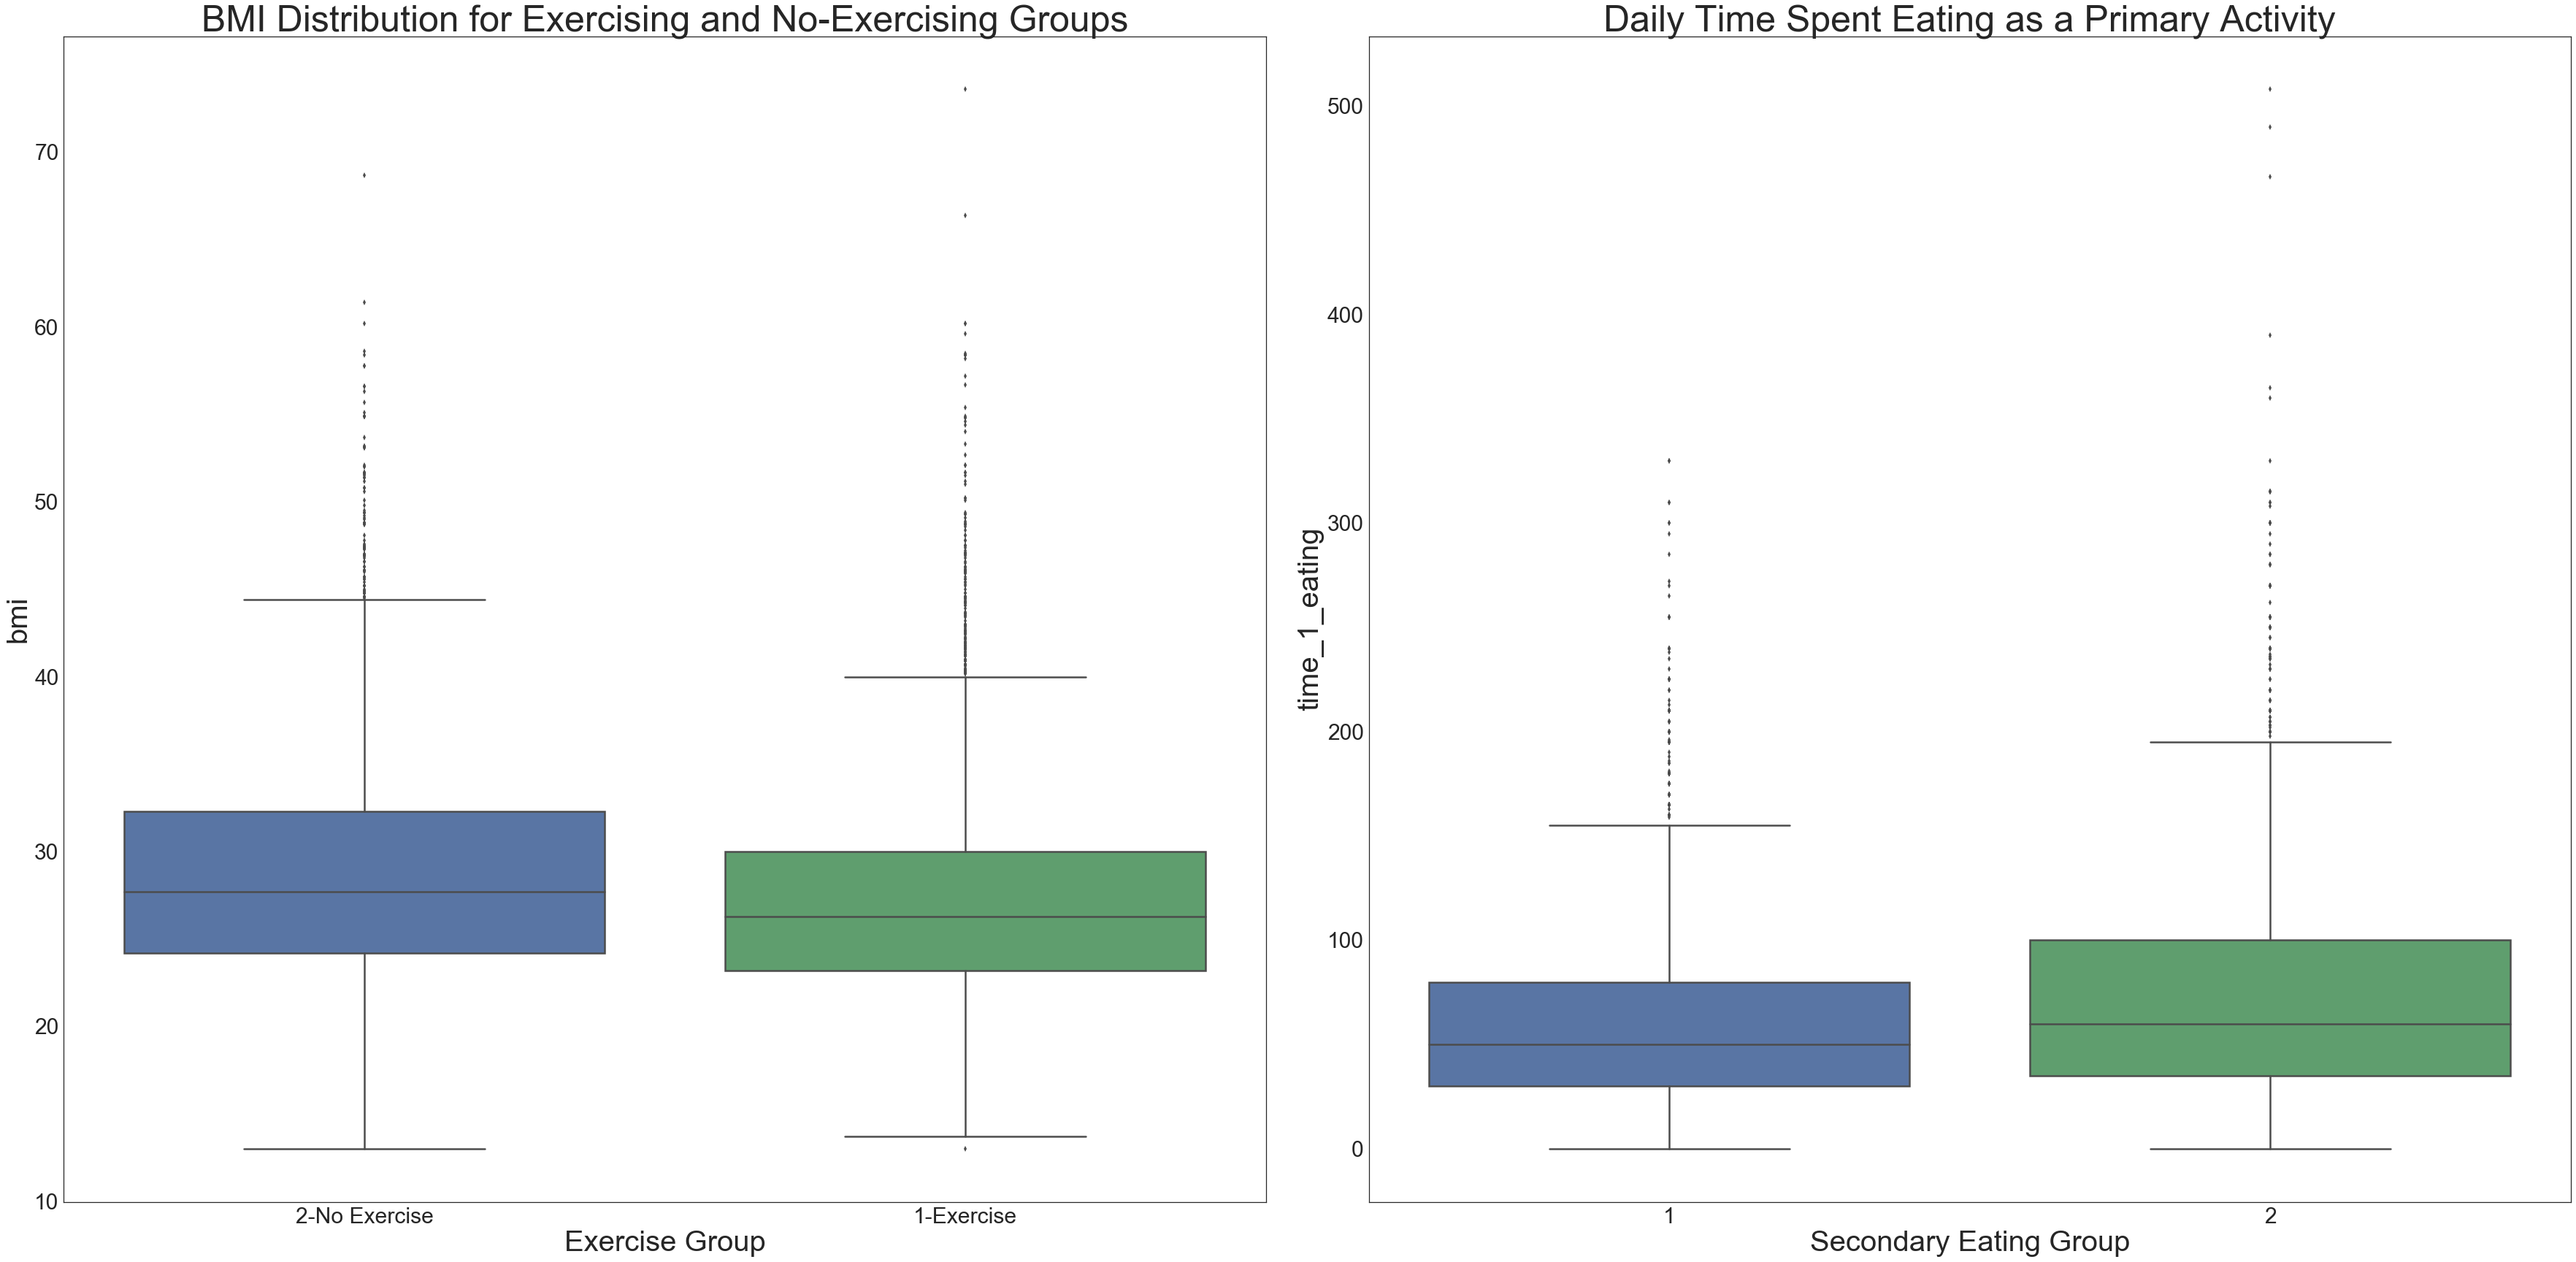

In [310]:
f, ax = plt.subplots(figsize=(50,25))

rc={'axes.labelsize': 40, 'font.size': 40, 'legend.fontsize': 40, 'axes.titlesize': 50,\
    'xtick.labelsize': 30, 'ytick.labelsize': 30}
plt.rcParams.update(**rc)



ax1 = plt.subplot(121)
sns.boxplot(x="exercise", y="bmi", data=df_secondary_eating, linewidth=2.5)
ax1.set_title("BMI Distribution for Exercising and No-Exercising Groups")
ax1.set_xlabel("Exercise Group")

ax2 = plt.subplot(122)
sns.boxplot(x="secondary_eating?", y="time_1_eating", data=df_secondary_eating, linewidth=2.5)
ax2.set_title("Daily Time Spent Eating as a Primary Activity")
ax2.set_xlabel("Secondary Eating Group")

plt.tight_layout()

#### Initial Conclusions: 
1. Survey participants who exercise spend significantly more time primary eating. 
2. Survey participants who do not eat while doing other activities spend significantly more time primarily eating
3. Survey group that exercised in the last 7 days has a significantly lower mean bmi than those who did not.

#### Next Question:
#### If BMI is binned by category (ie. obese, overweight, healthy weight, underweight) are there differences in eating and exercise habits?

In [271]:
#Create bins for BMI ranges and run t-test for eating habits

#Binning function:
def binning(col, cut_points, labels=None):
    #Define min and max values:
    minval = col.min()
    maxval = col.max()

    #create list by adding min and max to cut_points
    break_points = [minval] + cut_points + [maxval]

    #if no labels provided, use default labels 0 ... (n-1)
    if labels is not None:
        labels = range(len(cut_points)+1)
        
    #Binning using cut function of pandas
    colBin = pd.cut(col, bins=break_points, labels=labels, include_lowest=True)
    return colBin

#Binning bmi:
col =  df_secondary_eating['bmi']
cut_points = [18.5,25,30]
labels = ["underweight","healthy weight", "overweight", "obese"]
df_secondary_eating["BMI_Bin"] = binning(df_secondary_eating["bmi"], cut_points, labels)
print('Number of Survey Participants per BMI Category')
result = pd.value_counts(df_secondary_eating["BMI_Bin"])
print(result)




Number of Survey Participants per BMI Category
2    3681
1    3651
3    3018
0     197
Name: BMI_Bin, dtype: int64


C:\Users\stace\Anaconda3\lib\site-packages\ipykernel\__main__.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [208]:
#Is there a significant difference in primary eating between different bmi bins
a = df_secondary_eating['time_1_eating'].ix[lambda x: df_secondary_eating['BMI_Bin'] == 'obese']
mean_a = a.mean()
b = df_secondary_eating['time_1_eating'].ix[lambda x: df_secondary_eating['BMI_Bin'] == 'overweight']
mean_b = b.mean()
c = df_secondary_eating['time_1_eating'].ix[lambda x: df_secondary_eating['BMI_Bin'] == 'healthy weight']
mean_c = c.mean()
tval,pval=stats.ttest_ind(b, a,equal_var=True)
print('\n Groups: Obese, Overweight, Variable: Primary Eating Time')
print("t-value:",tval,'\n',"p-value", pval,'\n',"Mean Primary Eating Obese Group:",mean_a,'\n',"Mean Primary Overweight Group:",mean_b)
tval,pval=stats.ttest_ind(c, a,equal_var=True)
print('\n Groups: Obese, Healthy Weight, Variable: Primary Eating Time')
print("t-value:",tval,'\n',"p-value", pval,'\n',"Mean Primary Eating Obese Group:",mean_a,'\n',"Mean Primary Healthy Weight Group:",mean_c)


 Groups: Obese, Overweight, Variable: Primary Eating Time
t-value: 4.11182407965 
 p-value 3.97240000003e-05 
 Mean Primary Eating Obese Group: 61.952617627567925 
 Mean Primary Overweight Group: 66.68676989948383

 Groups: Obese, Healthy Weight, Variable: Primary Eating Time
t-value: 5.53813980217 
 p-value 3.17361168076e-08 
 Mean Primary Eating Obese Group: 61.952617627567925 
 Mean Primary Healthy Weight Group: 68.4801424267324


#### Conclusion: Survey participants categorized as obese spend less time eating as an exclusive activity compared to both those categorized as overweight or healthy weight.

In [267]:
# Is there a significant difference in the number of people who exercise/don't exercise by bmi bin
bmi_tab =pd.crosstab(df_secondary_eating.BMI_Bin, df_secondary_eating.exercise, margins=True)
observed = bmi_tab.ix[0:4,0:2]   # Get table without totals for later use
print("Observed Number of People per Category:")
print(observed)

bmi_tab.columns = ["1-Exercise","2-Exercise","row_totals"]

bmi_tab.index = ["underweight","healthy weight","overweight","obese","col_totals"]

expected =  np.outer(bmi_tab["row_totals"][0:5], bmi_tab.ix["col_totals"][0:3]) / len(df_secondary_eating)

expected = pd.DataFrame(expected)
expected = expected.ix[0:3,0:1]

expected.columns = ["1-Exercise","2-Exercise"]
expected.index = ["underweight","healthy weight","overweight","obese"]
print("\n Expected Number of People per Category:")
print(expected)
chi_squared_stat = (((observed-expected)**2)/expected).sum().sum()

print("\n chi_squared_stat:")
print(chi_squared_stat)

crit = stats.chi2.ppf(q = 0.95, df=3) # df is each to the product of (each variable -1)

print("Critical value")
print(crit)

p_value = 1 - stats.chi2.cdf(x=chi_squared_stat,df=3)  # Find the p-value
                             
print("P value")
print(p_value)

Observed Number of People per Category:
exercise        1-Exercise  2-No Exercise
BMI_Bin                                  
underweight            118             79
healthy weight        2534           1117
overweight            2377           1304
obese                 1641           1377

 Expected Number of People per Category:
                 1-Exercise   2-Exercise
underweight      124.584242    72.415758
healthy weight  2308.919124  1342.080876
overweight      2327.891344  1353.108656
obese           1908.605291  1109.394709

 chi_squared_stat:
60.84647096505947
Critical value
7.81472790325
P value
3.87578857897e-13


#### Conclusion: The chi-squared test between the BMI categories and Exercise categories supports that the two variables are dependent on each other

### Roll Out

#### 1. Study Participants: 
Participants with a bmi of 30 or greater can enroll in the study using an app developed through Apple's Researchkit.
All participants must have a smart scale and apple watch. Apple watches and smart scales will report data directly back to a research database.

Participants will be randomly distributed upon enrollment into 3 test groups and 1 control group. Upon enrollment all participants will be instructed to weigh themselves first thing in the morning and enter start and finish time for each meal and exercise.

Group 1: Participants will be instructed to eat 3 meals per day for a minimum of 20 minutes while not performing any other  activity. Participants will also be instructed to exercise at least 30 minutes daily

Group 2: Participants will be instructed to exercise for 30 minutes. No additional instructions for eating

Group 3: Participants will be instructed to eat 3 meals per day for a minimum of 20 minutes while not performing any other activity. No additional instructions on exercise.

Group 4: Participants will have no additional instructions

Participants  into group 1 (test) or group 2 (control) using 
Apple Watch wearers with smart scales who fall into the obese category can enroll in the study through an app developed through Apple's research kit. 

Details on apple's research kit:
https://www.apple.com/researchkit/

### Experimental Design:
1. Enrollment will be rolling - participants can continuously sign up. Results will be aligned to time enrolled - ie. the results of a newer participant will be compared to the same time point for participants that have been enrolled longer.
2. Benchmarks - Results will be analzed continuously but 3 months, 6 months and 1 year will serve as benchmarks. Significant reduction in the mean bmi for a sample group compared to the control (group 4) that is sustained in subsequent measures up to 1 year will support an alternative to the null hypothesis.


### Analysis plan:

1. The primary metric used will be bmi. BMI will be calculated by participants smart scales and automatically uploaded. Significantly decreased BMI in any of the test groups will disprove the null hypothesis.
2. Exercise and primary eating times will be secondary metrics and be tracked to make sure participants are adhering to the group requirements. The apple watch accelerometer will be used to confirm eating time and exercise reported.
2. The distribution of the original mean bmi, exercise levels, and primary eating times will be continuously checked to confirm equality between the sample groups.








